## Spark

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession \
        .builder \
        .appName("exploration") \
        .getOrCreate()

24/12/03 21:09:28 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [2]:
from pyspark.sql.functions import array_contains
from pyspark.sql.functions import mean

In [3]:
data = spark.read.parquet("../data/data_with_attributes.parquet").select('id', 'cleaned_text', 'relevant_attr', 'moral').dropna()

In [4]:
data.show(10)

+-------+--------------------+------------------+-----+
|     id|        cleaned_text|     relevant_attr|moral|
+-------+--------------------+------------------+-----+
|1001mlo|hi im a 24 f who ...|       [8, 12, 13]| 0.67|
|1001vtv|ive been on self ...|[0, 4, 11, 12, 13]|  0.7|
|1002gvr|hey guys bit of a...|[1, 7, 11, 12, 13]| 1.09|
|1002unz|i tried to make p...|        [3, 7, 11]|  0.0|
|1008r6k|i am planning on ...|            [6, 8]|  0.0|
|100co8s|20mi write this a...|           [8, 11]|  0.0|
|100i773|looking back at t...|        [1, 4, 13]| 0.62|
|100mcvr|happy new year th...|     [0, 3, 5, 11]|  0.0|
|100oo5c|want to devote 6 ...|    [3, 5, 12, 13]|  1.2|
|100w0cv|hi all  although ...|            [1, 2]|  0.0|
+-------+--------------------+------------------+-----+
only showing top 10 rows



## Means per topic

Mental Health and Emotions

In [31]:
data.filter(array_contains(data['relevant_attr'], 0)).select(mean("moral")).show()

+------------------+
|        avg(moral)|
+------------------+
|0.4173098331810638|
+------------------+



Learning and Knowledge

In [6]:
data.filter(array_contains(data['relevant_attr'], 1)).select(mean("moral")).show()

+-------------------+
|         avg(moral)|
+-------------------+
|0.30639371673874954|
+-------------------+



Relationships and Issues

In [7]:
data.filter(array_contains(data['relevant_attr'], 2)).select(mean("moral")).show()

+------------------+
|        avg(moral)|
+------------------+
|0.3612543706857617|
+------------------+



Hobbies and Interests

In [8]:
data.filter(array_contains(data['relevant_attr'], 3)).select(mean("moral")).show()

+-------------------+
|         avg(moral)|
+-------------------+
|0.26110522605597536|
+-------------------+



Mindset

In [9]:
data.filter(array_contains(data['relevant_attr'], 4)).select(mean("moral")).show()

+-----------------+
|       avg(moral)|
+-----------------+
|0.361265251589833|
+-----------------+



Personal struggles

In [10]:
data.filter(array_contains(data['relevant_attr'], 5)).select(mean("moral")).show()

+------------------+
|        avg(moral)|
+------------------+
|0.4992281630492318|
+------------------+



Health and Fitness 

In [27]:
data.filter(array_contains(data['relevant_attr'], 6)).select(mean("moral")).show()

+------------------+
|        avg(moral)|
+------------------+
|0.2018994116589965|
+------------------+



Social Interaction

In [11]:
data.filter(array_contains(data['relevant_attr'], 7)).select(mean("moral")).show()

+-------------------+
|         avg(moral)|
+-------------------+
|0.32326955300725413|
+-------------------+



Career and Education

In [12]:
data.filter(array_contains(data['relevant_attr'], 8)).select(mean("moral")).show()

+------------------+
|        avg(moral)|
+------------------+
|0.2610162969880921|
+------------------+



## Local Python

In [89]:
import pandas as pd
import os
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

parquet_directory = '../data/data_with_topics.parquet/'
parquet_files = [os.path.join(parquet_directory, f) for f in os.listdir(parquet_directory) if f.endswith('.parquet')]
dfs = [pd.read_parquet(file) for file in parquet_files]
df = pd.concat(dfs, ignore_index=True)

df

,id,cleaned_text,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,emo_pos,emo_neg,emo_anx,emo_anger,emo_sad,moral
0,100phe5,personally i find that kind of stuff so addict...,0.248734,0.002506,0.002550,0.003143,0.004230,0.003298,0.729032,0.003230,0.003277,3.53,0.0,0.0,0.0,0.0,0.0
1,100pop2,last new year i made a new years resolution to...,0.116893,0.065164,0.069872,0.000419,0.217232,0.083271,0.288837,0.057190,0.101123,1.06,0.71,0.18,0.18,0.0,0.53
2,100tt3v,whats the difference between a good new years ...,0.089803,0.000645,0.000657,0.366495,0.317181,0.000849,0.148691,0.000832,0.074847,0.72,1.44,0.0,0.0,0.36,0.0
3,100upcd,i always worry about how my voice sounds to ot...,0.582016,0.004301,0.174586,0.005394,0.007264,0.209211,0.006061,0.005542,0.005624,0.0,5.56,3.7,0.0,0.0,0.0
4,101euz5,weve been using rewards all wrong how do you ...,0.000224,0.031925,0.080934,0.201670,0.000293,0.169493,0.515011,0.000224,0.000227,0.82,0.58,0.12,0.0,0.06,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507604,zzgrrv,it was just 5 months that im with the most bea...,0.096061,0.000734,0.000746,0.000920,0.161845,0.227582,0.206835,0.304317,0.000959,0.32,2.88,0.0,0.0,0.64,0.32
507605,zzusen,i recently came out of full time education ext...,0.326460,0.000531,0.000540,0.072768,0.000896,0.000699,0.343555,0.130436,0.124115,0.63,2.52,1.05,0.63,0.42,0.42
507606,zzv4b7,i successfully achieved my goal of 2022 to wor...,0.002754,0.002137,0.002174,0.002680,0.460063,0.002811,0.521834,0.002753,0.002794,1.33,0.0,0.0,0.0,0.0,1.33
507607,zzv7gt,i am practising better self esteem and thought...,0.053875,0.181359,0.000766,0.000944,0.001271,0.065829,0.258413,0.135857,0.301686,1.03,0.34,0.34,0.0,0.0,0.0


### Explore each topic

Mental Health and Emotions

In [4]:
with pd.option_context('display.max_colwidth', None):
    display(df.sort_values(by='topic0', ascending=False)[0:20][["topic0","cleaned_text"]])


,topic0,cleaned_text
287491,0.995254,therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy therapy
468245,0.992808,the word sorry itself isnt the issue but how and why you use it is the biggest issues ive seen with people who use the word sorry too much is that they never give any real reason as to why they are sorry so the word eventually becomes meaningless this happens because people will say sorry to avoid confrontation they may not actually be sorry or even know why they should be sorry but they dont want to deal with the situation at hand so they throw out an im sorry in hopes that the other person will accept the apology and move on then there are people with low selfesteem who use the word automatically assuming they are the problem and accepting defeat with out truly understanding why they are sorry both of these scenarios have one commonality people use the word sorry without given a reason for the apology as had been stated in this thread try replacing the word sorry with thank you ie sorry im late can be changed to thank you for waiting so long for me if it doesnt make sense to replace sorry with thank you make sure you provide a reason for the apology hopefully something more than just sorry i hurt your feelings try to find out why their feelings are hurt and address that finally assessing why you are sorry will help you understand if you even need to apologise at all maybe its their fault hope this helps
81591,0.991928,think about it this way the moment you get angry you are doing exactly what they want you to do if you ignore them completely now they are the ones wholl be angry because they cant hurt you are bring out any reaction out of you trust me it works also try to regain control over your emotions by deciding to put away your anger reason with yourself when you get angry why are you angry does being angry benefit you in any way why not unless the situation truly calls for it anger is useless and just makes your life worse and makes other people satisfied with your reaction its basically selfsabotage and try to make it a habit to look at the logical side of things before acting upon your emotions take a breath and ground yourself when has this anger ever benefitted you how much better off would you be mentally and in life in general if you didnt have this anger and also sometimes anger does come from internal issues you say that you feel a lot of it is due to self loathing and maybe that might be the case think deeply about why you get angry and if it might have to do with some problemsinsecurities you may have be kind to yourself its a long process controlling your emotions even if you slip up sometimes its okay
250173,0.991879,when youre in therapy for complex trauma the topic of different egostates will come up the inner child egostate describes when behaviors thoughts and feelings from your childhood are replayed in current moment a therapist bringing up that someones behavior seems to regress into a survival mode when trauma is discussed or when theyre in contact with challenging people isnt an insult they are bringing it up so you can correctly identify when its happening and better understand the roots of it its an important part of recognizing how our past lingers with us especially if youve been through trauma as a child im speaking from a personal experience as someone who started psychotherapy this year and has observed how differently i start behaving when my trauma is triggered and i get stuck in a trauma survival mode it can be jarring to feel out of control of your emotions and the reflexlike apologizing and peoplepleasing you f

 Media (Books and entertainment)

In [5]:
with pd.option_context('display.max_colwidth', None):
    display(df.sort_values(by='topic1', ascending=False)[0:20][["topic1","cleaned_text"]])

,topic1,cleaned_text
225465,0.988408,think about the stuff you read if you feel like getting something out of a chapter put the book aside or stop the podcast and think about it what does it really mean how is it linked to other aspects you already know that is the most important thing what this gets you is a general understanding for the topic rather than to know a bunch of details if you have a hard time remembering detail the book is worth a second read details can be remembered very easy if you have a deep understanding you can even derive details you self this appeals to most subjects however there are exceptions for example sciences like biology and chemistry demand a high knowledge of details next to a profound understanding of the concepts using the feynmantechnique after every chapter is also good way to comprehend ideas and concepts
144257,0.987087,i saw this video recently its about a tactic originaly desigend by robert greene and later on changed a bit by his deciple the whole video is about not memorising the book but rather studying it which is really a good concept this is also what ive been trying myself to do basically as you read along the book you fold the corner of a site and highlight everything you find useful and want to learndont fold the corners of pages you have no highlights on they are just a indication of it being there such as quotes information or anything else when you finish the book you go through your highlights and write them down on notes then you categorize these notes in to piles of the same category and you read through them occasionally the idea is to create an outside brain where you organize information efficiently anyway i hope you find this useful and i wish you luck on your reading
111444,0.986748,people say that books can educate you in building character and learning new everyday skills this may come out as a stupid question but i dont understand what kind of books i should read should i read classical literature selfimprovement books academic books maybe im just lazy and havent gotten into the habit of reading when i havent achieved anything good out of it such as something worth learning also just as a side question how do i absorb more from books i read or is annotating the only way kind of two side questions but the first one is more like the main side question
363849,0.986010,ive been struggling with this for a long time but not so much anymore what i realized was that there were a great many things that i wanted to do yet i didnt do them i realized the reason was i didnt actually feel like i got something out of doing whatever it was i felt like i had to do since that realization ive been much more picky about what types of things i set up as goals if i set things i truly want as goals i will automatically do them the last couple of months ive hardly played video games i didnt want to because fulfilling the goals i set were more interesting example ive never been very good at reading books i knew i was missing out on good stories so i tried buying a book i was sure id like sure enough i made it through one chapter and never touched the book again in regard to something else i ended up buying a self help book when i got it i found myself actually taking time to read it then i read another thats what made me come to the conclusion that i simply must not have felt i got enough out of reading the fictional book id bought at first that made me think about many other things in my life i hadnt accomplished even though i said to myself i wanted to as a result im now more focused on things that really matter to me and i achieve more things that matter and that makes me happier
153798,0.985438,id disagree on the being valuable to others part human relationships are transactional for the most part the second you make their life worse or harder youre likely to be ghosted value isnt necessarily just money or status but also how you make other people feel are you an amplifier to their li

Relationships, sexual life and social media

In [6]:
with pd.option_context('display.max_colwidth', None):
    display(df.sort_values(by='topic2', ascending=False)[0:20][["topic2","cleaned_text"]])

,topic2,cleaned_text
290168,0.990457,yes im sure thats common for single women but for single men the assumptions made about you are worse downright insulting there is nothing wrong with being gay but i dont like being assumed im gay or in extreme cases something worse like a pedophile or sexual creep they assume theres just something wrong with you you cant possibly be a normal or even a decent gentlemen and still be single there has to be something wrong with you even though you act normal and i like you but you must be hiding something dark and nasty the strange part is its women who say its strange im single a lot of men get it that its really hard out there even the guys who found a partner they partially get it because of the many rejections it took to finally find someone who said yes women express surprise im single and struggle in dating but then if someone were to ask if they would date me its like uhno strange isnt it like they personally wouldnt date me but theyre surprised im not a hit with women as a whole
448272,0.990420,theyre not real theyre not real theyre not real theyre not real theyre not real theyre not real theyre not real theyre not real theyre not real theyre not real theyre not real theyre not real theyre not real theyre not real theyre not real theyre not real theyre not real theyre not real theyre not real theyre not real theyre not real theyre not real theyre not real theyre not real theyre not real theyre not real theyre not real theyre not real theyre not real theyre not real
360427,0.990357,i am jealous of all the people who get to have casual sex easily especially women i know the sex might not always feel good but still atleast once in a while it would be fun for them i am also jealous of people who get attention from the opposite gender i was seeing a post on a sub where women where asking the op to make a reddit post looking for friends as a female and shell get enough attention and validation i have seen many women tell that they use dating apps to talk to men just for the attention and validation when i tell people that i crave for attention and validation too everyone tells me to get over it if i try posting on reddit or using dating apps i will barely get a reply i dont think i am conventionally good looking enough to get casual sex either i dont hate women or wish them any harm nor am i an incel just another lonely guy among the millions of lonely guys like me and i know jealously is not healthy but i dont know how to rid of this feeling tldr lonely guy jealous of people who get attention and validation from opposite sex through apps and jealous of people who get to have casual sex easily
348559,0.989866,yes and at the same time some people do work like that its possible to find someone who has the same inclinations or porn habits as you the person who likes midget porn can either be with a midget or with a woman whos okay with her partner watching it if a woman or man isnt okay with their partner watching porn then they find someone who has the same view as them but they should never force themselves to be okay with thats just unhealthy and its not okay because yk insecurity and jealousy will just worsen the relationship so they should find someone compatible with them and that is possible because there are many women who r okay with their partner watching porn and there are many men who dont watch it i just dont see why u have to change urself for someone porn habits do play a big part in a relationship and we shouldnt tell somebody to be okay with either a man like or a man like that and for ur cheating point at the start i just want to say a cheater will cheat anyway if porn is the only thing stopping that person cheating you most definitely should not be with them
296816,0.989812,i think if drugs make you extremely nervous dont do them plenty of people live perfectly fulfilling lives without ever doing any drugs your girlfriend can do drugs without you and if there winds up being a

Skills and leisure

In [19]:
with pd.option_context('display.max_colwidth', None):
    display(df.sort_values(by='topic3', ascending=False)[0:20][["topic3","cleaned_text"]])

,topic3,cleaned_text
180489,0.992732,i have to agree with uxdchan the left brainright brain thing isnt a great way to look at this behaviour doesnt happen purely in isolated regions lots of different areas communicate together and the differences between hemispheres is incredibly subtle when compared to other brain regions eg the difference between the frontal lobe and the occipital lobe is massive however one thing is very clear the brain evolves and adapts to become better at what we do most its called neural plasticity fascinating stuff if you ever get the chance to read into it if you want to become more logical then put yourself in situations that will require logic certain puzzles can be a great way to do this but make sure to mix it up doing the same type over and over again will only make you good at the puzzle as opposed to applying logic in a variety of situations if you want to remember names and words then practice doing so on a regular basis youll probably be bad at it at first but over time you will develop tips and techniques mnemonics sentences using all the words in order etc that will make it easier you could use a random word generator for example and write them down see how many you can remember in 24 hours and repeat increase the number of words to make it more challenging or even better come up with a method that works for you youre not going to become better instantaneously but in a few months you will likely notice an improvement good luck
79419,0.992268,just consume all kinds of content that is written or spoken in proper english and pay attention i was always good with languages and id say the main reason for that is because i was always paying attention i was trying to learn and understand the language instead of just doing the bare minimum like many people for whom everything is a chore so if you want to get really good at anything then develop an interest in it and with english its already very easy as most stuff online is in that language so just find whatever interests you and read or listen to it but what is also important if you actually want to be able to express yourself properly is to speak the language listening alone isnt enough and if you want to mainly express yourself through text then practicing that as you might on online forums like this can already be all you need but if you also want to learn to speak properly then youll have to practive that and to pay attention to pronunciation as well so all in all learning a language and mastering it is all about putting it to use and practicing it as much as possible and as with everything else the more effort you put into it and the more attention you pay to all the details the faster youll learn and get to the level of a master or native speaker and im not an english speaker myself btw
374353,0.990563,r and i have been working on the same for the last few months and have been working on the project management and project management project management project management and management management project management project management project management project management project management project management project management project management project management project management project management management management based on my project manager project based on my project project manager project assistant
34429,0.990067,i also click on ignore limit about 80 of the times they pop up but i think what has helped me is my shitty internet connection and staying busy with other stuff like a hobby and uni work sometimes with my bad internet connection i think i am connected but i am not whats good about this is that i dont have any new notifications to distract me apart from reminders alarms and other offline phone things of course i can simply turn on airplane mode or disable my internet connection but i dont want to do that most of the time which is why having a bad internet connection comes in handy to an extent bottom line is work on your s

Mindset

In [20]:
with pd.option_context('display.max_colwidth', None):
    display(df.sort_values(by='topic4', ascending=False)[0:20][["topic4","cleaned_text"]])

,topic4,cleaned_text
297943,0.993750,its great that youre open to the idea of laughing at your own mistakes and using them as an opportunity for growth its a valuable mindset to have as it allows us to take risks learn from our failures and ultimately become better versions of ourselves however its also important to recognize that its not always easy to let go of our egos and accept our mistakes with humor and grace one strategy that may help is to reframe your perception of mistakes instead of seeing them as failures or flaws view them as opportunities for growth and learning by shifting your mindset you may be more likely to embrace your own stupidity and laugh at yourself when you make mistakes another approach is to practice mindfulness and selfawareness by staying present in the moment and recognizing when your ego is getting in the way you can learn to let go of negative thoughts and emotions and approach situations with a more open and receptive mindset as for myself i do enjoy finding the humor in those moments that i make mistakes after a good laugh though i make an effort to ask myself how i can learn from it i would like to ask you how do you currently handle situations where your ego gets in the way and what steps are you taking to develop a more lighthearted and growthoriented mindset
358594,0.993631,i believe that when we put in the effort to better ourselves we can achieve amazing things and experience the best feeling in the world watching things finally fall into place after watching them fall apart for so long i know from personal experience that it can be difficult to put in the work required to improve ourselves it can be tempting to give up or take the easy way out but i have found that the rewards of hard work are worth it when we work hard on personal growth and selfimprovement we can achieve our goals and dreams we can become the best version of ourselves and live a fulfilling life its not always easy but its worth it for me the best feeling in the world is watching things finally fall into place after watching them fall apart for so long its the feeling of accomplishment and satisfaction that comes from knowing that i put in the work and made it happen so if youre struggling with personal growth and selfimprovement i encourage you to keep going keep working hard and pushing yourself to be better the rewards are worth it and youll experience the best feeling in the world when you finally achieve your goals remember its never too late to start working on yourself you have the power to change your life and achieve your dreams so lets all work hard on personal growth and selfimprovement and experience the best feeling in the world together
406655,0.993447,successful people all have one thing in common a growth mindset this means they believe in developing their abilities and intelligence through hard work and dedication and view challenges as opportunities to grow they are positive resilient focused determined adaptable selfdisciplined grateful and always seeking to learn and improve as the famous saying goes success is not final failure is not fatal its the courage to continue that counts this perfectly embodies the growth mindset of successful people they understand that success is a journey not a destination and that it takes perseverance hard work and an unrelenting drive to achieve their goals in short successful people are not afraid to fall because they know that every fall is an opportunity to stand up taller the takeaway embrace a growth mindset stay positive and never stop striving for success youll be amazed at what you can achieve
410688,0.993291,what if you could be everything you truly desired what if the things you want came easy to you what if it were easy for you to achieve everything you truly desired and everything you truly need showed up for you what if it were simple and easy for you to be aligned with everything you wanted so you could no longer need to want it because it was already

Personal struggles

In [21]:
with pd.option_context('display.max_colwidth', None):
    display(df.sort_values(by='topic5', ascending=False)[0:20][["topic5","cleaned_text"]])

,topic5,cleaned_text
31683,0.991753,we all make mistakes that is correct but we dont all blow those out of proportion why would you not trust anyone if he makes mistakes sometimes whether you can trust them or not should mainly depend on whether that person is learning from their mistakes or not someone who doesnt ever learn keeps repeating the same mistakes over and over and those people are unreliable but a normal mentally healthy person is always looking to learn and improve no truly sane person would be fine with making the same mistakes over and over again so as long as you are always making new mistakes what could be wrong with that to expect to never make mistakes means that youd expect anything to be perfect and such a thing does not exist so forget that idea quickly be willing to make mistakes and to learn from them because that is the only way how you can avoid making similar mistakes in the future the more mistakes you make the more you learn and the fewer you will make later on even if you keep trying out completely new things that youve never done before but you wont learn anything if youre not willing to mess up at times realize that the only bad thing is to keep repeating the same mistakes unwilling to ever learn from them and to change your behavior thats the only thing you should be afraid of
135858,0.990495,no its not too late youve barely spent 5yrs being an adult when there are so many more years ahead of you people dont generally come into their own until their mid 20s before figuring themselves out keep asking yourself who am i what do i really want and what can i do right now to eventually get there i was a big fuck up for a while and family isnt all its cracked up to be i said fuck off to the most deluded person in my family and only stay in touch with the ones i do love and who love me back for who i am i dont speak to them and we are civil enough to work with each other if necessary you can build your circle of people you trust and people you care about ive wasted my 20s luckily i dont want kids so the pressure is off there i know what im willing to put up with to get what i want take care of yourself youre doing the beat you can considering the shit you are in the shit the world is in try bot to take it personally take a step back at life and the universe and make space for yourself youre here and you deserve a spot here sorry its so long winded but yeah this is my advice good luck
469925,0.989296,hi thanks for the support i totally agree on what you say before when i would mess up even the slightest id immediately degrade myself and think that i have to fix things because i messed up rather than wanting to fix things because it needs to be long story short whenever i mess up this is how i would think now ah you messed up thats okay as long as you know that you have to fix this because this will benefit you its okay to make mistakes just learn from this vs before you messed up you stupid bitch fix this youre embarrassing in no means do i support blaming others for your own mistakes theres a difference between selfcompassion and being complacent thank you for your insight
468534,0.988394,think of a person you love very much but struggles often maybe someone who is older amp requires a little bit of patience or help to get by for me its my grandma shes slow moving about not too great with technology and frequently needs to have things repeated to her for my best friend its her little brother with a mental disability to a stranger he appears to be a normal 14 year old whenever i am annoyed with people for any reason walking to slow cutting me off talking to loudly etc i just think to myself what if that was my grandmother i would want the person in my shoes to be as kind and as patient as possible the idea of anyone being an asshole to my grandma or to my friends brother is so moving for me that i treat whoever it is with the same kindness and patience eventually you just get used to living like this an

Health and Fitness

In [22]:
with pd.option_context('display.max_colwidth', None):
    display(df.sort_values(by='topic6', ascending=False)[0:20][["topic6","cleaned_text"]])

,topic6,cleaned_text
13533,0.996955,some of us like to exercise and some of us dont but we all have one thing in common on this selfimprovement journey we want to lose weight weve all been told that you must exercise to lose weight but last year i wanted to lose weight and did so without exercise i went for 84kg to 70kg in 3 months without exercise and here are my tips for those looking to do the same the first and obvious way to lose weight without exercise is your diet scientists have now proved that 75 of weight loss is actually your diet so eating a healthy diet is much more important than exercise but what does a good diet consist of a good diet mainly contains lots of fruits vegatables wholegrain foods lowfat dairy products healthy proteins and lots of water but it also restricts unhealthy snacking alcohol consumption and sugary drinks use these tips to create healthy meals and a healthy diet plan even though eating a healthy diet is the main way that you can lose weight there are still 4 more easy to apply tips to accelerate weight loss without exercise get plenty of sleep reduces unhealthy food cravings take cold showers burns unhealthy fats and improves metabolism walk instead of exercise walking burns just as many calories as exercise and finally drink black coffee caffine promotes weight loss reduces inflammation and food cravings if you use these 4 quick tips paired with a healthy diet then you will easily lose weight without exercise people tell you that losing hard without exercise is hard but just remember that a healthy diet will make up 75 of your weight loss
476392,0.996182,to improve your circadian rhythm 1 eat 2 hours prior to sleep and eat light 2 avoid drinking water just before sleep also avoid drinking water during the night when you wake up drinking water charge up your body 3 go to bed on same time daily no matter what 4 avoid screen time and any light exposure except red light 1 hour before bed 5 push yourself out of bed in morning and go and sit in sun for atleast 10 mins sunlight improves sleep cycle plus low vitamin d can also cause insomnia so sunlight will help in producing vitamin d also drink water as soon as you get up it will keep you awake as it will charge up your body 6 sleep cycle is of 90 mins so a person will sleep 45 sleep cycle minimum 4 sleep cycles that is 6 hours and maximum suggested is 5 sleep cycle that is 75 hours you will always find that you will get up in exactly these sleep cycles now test your sleep cycles for few weeks and you will start getting up without an alarm anything below 6 hours is harmful for body and anything above 75 8 hours means either you are too stressed or body isnt well and is trying to recover look out for signs 7 as you get up leave the bed and in the day try not to sit at one place for more than 30 mins if you work in office try taking a 23 mins break after every 30 mins 8 workout minimum for 30 mins on regular basis follow wind down time and dont stress too much its been years you are not following a proper sleep routine so give body few weeks to adjust back and stick to it mind and body loves to go back to the old self so train your mind and body to adopt and learn this new routine all the best edit 9 avoid alcohol or drugs before sleep rather use meditation to get high on life
196547,0.995655,it can be challenging to establish a morning gym routine especially if you are a night owl and tend to stay up late however with some planning and effort it is possible to make this a regular part of your routine here are a few tips that may help start gradually if you are not used to waking up early it can be helpful to start by gradually adjusting your sleep schedule try going to bed 1530 minutes earlier each night and waking up 1530 minutes earlier each morning until you reach your desired wakeup time this can help your body adjust to the change more easily create a relaxing bedtime routine establishing a consistent and relaxing bedtime routine can help yo

Confidence

In [23]:
with pd.option_context('display.max_colwidth', None):
    display(df.sort_values(by='topic7', ascending=False)[0:20][["topic7","cleaned_text"]])

,topic7,cleaned_text
132546,0.992117,thanks for this long comment having hair thick or thin in general doesnt affect your dating life cause theyre taken for granted by most of people not having them affects it cause its not expected especially at a young age ive been teased by some of my girl classmates when i shaved my head and my receded hairline was visible i was treated in a very different way when i had hair in fact now that they grew back my life is as usual its been an hell to wait for them to grow but anyway i just think certain girls dont mind it it doesnt mean they like it but they dont dislike it too ofc aesthetically talking the difference is huge bald guys that attract girls usually are confident about it thats the important part most of girls dont like a bald head rightly but a great percentage of them dont mind it if the guys got a good attitude towards it yeah ive already got an interest but now due to covid i cant meet people with the same interest as mine cinema and screenwriting my psychiatrist put me in some projectsgroups about cinema with other patients of her but now theyve not even started because of this situation i dont know i dont think id like to be dependent from those products
50800,0.991977,be confident in your own skin be confident in who you are and what youre interests are try to just genuinely get to know people dont be like how i used to be and think small talk is useless small talk is the tip of the iceberg of getting to know people it lets you gauge their initial personality and demeanor which allows you to figure out how to approach them in further more nuanced conversations sometimes personalities just dont mesh and conversations are awkward dont force it im the king of being comfortable in silence when i have nothing to say and 50 of the time will let others initiate the topic smile be courteous make only as much eye contact as you feel comfortable when you are speaking but always when they are one final note some people will embellish stories to make them more interesting if you have any stories to tell but theyre meh a little extra seasoning usually something funny doesnt hurt dont overdo it as i known a few that do and its always obvious how ridiculous theyre stories sound one or two crazy out there stories at believable 10 and youre just a liar trying to sound cool
148282,0.991775,i appreciate your comment honestly thank you this is going to come across possibly so arrogant which i do hate so sorry in advance but i think part of the reason why its really knocking my confidence is because i know im not awful to look at i used to have such low self esteem w my appearance but as ive gotten older ive gotten more physically attractive and confident in my looks which sounds super conceited but it means im being doubly hard on my personality bc its clearly when people get to know me they stop liking me lol all these guys liked me before they got to know me so wtf is so shitty about my personality im overthinking everything ive ever said or done like is my extrovertedness interpreted as a pick me attitude is my confidence seen as arrogance i will happily crack jokes and tells stories on nights out does that make me look self centred and attention obsessed all these traits ive worked so hard to develop im now thinking theyre whats making me so unattractive to people around me i grew up shy and quiet and insecure and aside from the latter as of recently im the total opposite now but maybe i was better off the other way i think youre right tho idk when i started seeking validation but that definitely seems to be a big issue for me at the moment and its causing me a lot of grief
266469,0.990393,adjective name title trick is what i tend to use the trick i use is to get to know the person a little and tack on a title as soon as i get to know them i usually include conversation starters as a way to describe them like where are you from would lead to joe from missouri but these titles get really ge

Career and Education

In [24]:
with pd.option_context('display.max_colwidth', None):
    display(df.sort_values(by='topic8', ascending=False)[0:20][["topic8","cleaned_text"]])

,topic8,cleaned_text
170937,0.995100,my whole life i walked around thinking i was too stupid to study anything related to medicine or sciences at high school i convinced myself i am too dumb to ever succeed in sciences and only now later in life have i realized i had it all wrong a large part of my life so far i spent thinking i am not like other people i cannot succeed like other people i cannot have the smarts like other people i am different i am not worthy after high school i went on to do a degree and then postgrad degree in the business field which was followed by 3 years working experience now in supply chain however i have to come to the realization earlier this year that this is not my dream this was never my dream i always hid my true interest and passion which was in the medical field but like mentioned somewhere i convinced myself in my life that i could never be smart enough to do anything medicine however several months ago i realized i was wrong i was wrong about myself i can go for my dreams and it is never too late what do i have to lose i am good enough i am smart enough i did research and finally found a degree that i can study only setback is that i needed to take physical sciences at high school level which i will be doing next year through a external institution once i have that i can apply for 2021 part time studies at university in my chosen program which means ill probably only graduate around the age of 32 this is terrifying also to juggle a full time job with studies will be hard but i have no children and dont plan on them for a very very long time is there anyone on here that has decided to change careers later in life i need to hear some stories or advice or inspiration i am looking forward to this goal in my life but i also scared that i am going to graduate too late in life
62607,0.995003,i graduated high school with a 20 gpa in my country you need to take special english classes to go to university since i did not start taking these english classes in grade 9 i couldnt take these classes in high school i am currently in a program i have no interest in but next year i plan to transfer into a general arts and science program i contacted admissions at a local university and i can ether take a privet highschool credit to get in or take a couple years in general arts to transfer into university my plan is take the general arts and science and use that time to work on my health and post secondary skills im posting this because the public education system failed me my iep was always ignored the guidance department didnt help me im not a dull kid have good grades in collage so far and i have taken online courses in my spare time i just know there are other guys like me out there so to anyone who feels like there out of place remember 90 of learning is studying the only thing schools do is review studying materials with you and administer tests and labs you can buy textbooks and not be in university you can even find old textbooks online and some services let you audit classes online so if the education system fails you too dont give up on learning as long as you can try you can succeed
117304,0.993899,i dropped out to i had my ged and was working full time before the rest of my class graduated im an insurance agent now and make pretty good money doing it heres what you do go get your ged asap right now google the local places that will do free ged prep and find out how soon you can take the test spend your days productively by learning about an industry or trade you want to work in once you get your ged if you need a degree for the field youre interested in get yourself enrolled in a community college and start knocking out some basic credits maybe even get a twoyear degree before transferring to a state school this is if you want to have a job that absolutely requires a degree like lawyer or doctor yes you can be both with a ged and a community college degree if you dont need a degree get yourself int

## Topics across morality charged language

In [8]:
df['moral'] = df['moral'].astype(float)

In [14]:
df['moral'].describe()

count    507606.000000
mean          0.329382
std           0.699273
min           0.000000
25%           0.000000
50%           0.000000
75%           0.400000
max          16.390000
Name: moral, dtype: float64

In [15]:
quantiles = df['moral'].quantile([0.70, 0.71, 0.72, 0.73, 0.74, 0.75, 0.80, 0.85, 0.90, 0.95, 0.99])  
print(quantiles)

0.70    0.00
0.71    0.18
0.72    0.25
0.73    0.31
0.74    0.36
0.75    0.40
0.80    0.63
0.85    0.88
0.90    1.20
0.95    1.71
0.99    3.23
Name: moral, dtype: float64


Bin 0: no moral language

Bin 1: Scores greater than zero and up to 0.28 (below LIWC's average; below the 72nd percentile in current data).

Bin 2: Scores greater than 0.28 and up to 0.63 (between the 72nd and 80th percentiles in current data).

Bin 3: Scores greater than 0.63 and up to 1.20 (moderate scores; between the 80th and 90th percentiles in current data).

Bin 4: Scores greater than 1.20 and up to 3.23 (high scores; between the 90th and 99th percentiles in current data).

Bin 5: Scores greater than 3.23 (outliers with very high morality scores; above the 99th percentile in current data).

In [76]:
attributes_directory = '../data/data_with_attributes.parquet/'
attributes_files = [os.path.join(attributes_directory, f) for f in os.listdir(attributes_directory) if f.endswith('.parquet')]
dfs_attributes = [pd.read_parquet(file) for file in attributes_files]
df_attributes = pd.concat(dfs_attributes, ignore_index=True)
df_attributes['moral'] = df_attributes['moral'].astype(float)

df_attributes

,id,cleaned_text,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,emo_pos,emo_neg,emo_anx,emo_anger,emo_sad,moral,relevant_topics,relevant_liwc_scores,relevant_attr
0,100phe5,personally i find that kind of stuff so addict...,0.248734,0.002506,0.002550,0.003143,0.004230,0.003298,0.729032,0.003230,0.003277,3.53,0.0,0.0,0.0,0.0,0.00,"[0, 6]",[11],"[0, 6, 11]"
1,100pop2,last new year i made a new years resolution to...,0.116893,0.065164,0.069872,0.000419,0.217232,0.083271,0.288837,0.057190,0.101123,1.06,0.71,0.18,0.18,0.0,0.53,"[4, 6]",[13],"[4, 6, 13]"
2,100tt3v,whats the difference between a good new years ...,0.089803,0.000645,0.000657,0.366495,0.317181,0.000849,0.148691,0.000832,0.074847,0.72,1.44,0.0,0.0,0.36,0.00,"[3, 4]",[12],"[3, 4, 12]"
3,100upcd,i always worry about how my voice sounds to ot...,0.582016,0.004301,0.174586,0.005394,0.007264,0.209211,0.006061,0.005542,0.005624,0.0,5.56,3.7,0.0,0.0,0.00,"[0, 5]",[12],"[0, 5, 12]"
4,101euz5,weve been using rewards all wrong how do you ...,0.000224,0.031925,0.080934,0.201670,0.000293,0.169493,0.515011,0.000224,0.000227,0.82,0.58,0.12,0.0,0.06,0.18,"[3, 6]",[],"[3, 6]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507600,zzrfyi,1 i have came out my shell i have suffered wi...,0.001674,0.001300,0.265627,0.001630,0.068845,0.001710,0.157562,0.120455,0.381199,2.0,3.33,1.33,0.0,1.33,0.00,"[2, 8]","[11, 12]","[2, 8, 11, 12]"
507601,zzrqgw,i bought 3 books and havent finished one of th...,0.001551,0.094803,0.001225,0.001510,0.002036,0.001584,0.555263,0.123237,0.218791,1.81,1.2,0.6,0.0,0.0,0.00,"[6, 8]","[11, 12]","[6, 8, 11, 12]"
507602,zzx58w,i am 26 years old for me mental peacestability...,0.209526,0.014702,0.048663,0.109917,0.000695,0.052650,0.000580,0.239667,0.323601,0.14,1.37,0.41,0.41,0.27,0.27,"[0, 7, 8]",[12],"[0, 7, 8, 12]"
507603,zzxdu8,i have made a lot of progress this past year a...,0.398510,0.000936,0.000952,0.040661,0.208732,0.001231,0.001319,0.001206,0.346452,1.42,1.78,0.71,0.0,1.07,0.00,"[0, 4, 8]","[11, 12]","[0, 4, 8, 11, 12]"


In [77]:
bin_0 = df_attributes[df_attributes.moral == 0.00]
bin_1 = df_attributes[(df_attributes.moral > 0.00) & (df_attributes.moral < 0.28)]
bin_2 = df_attributes[(df_attributes.moral >= 0.28) & (df_attributes.moral < 3.23)]
bin_3 = df_attributes[(df_attributes.moral >= 3.23)]

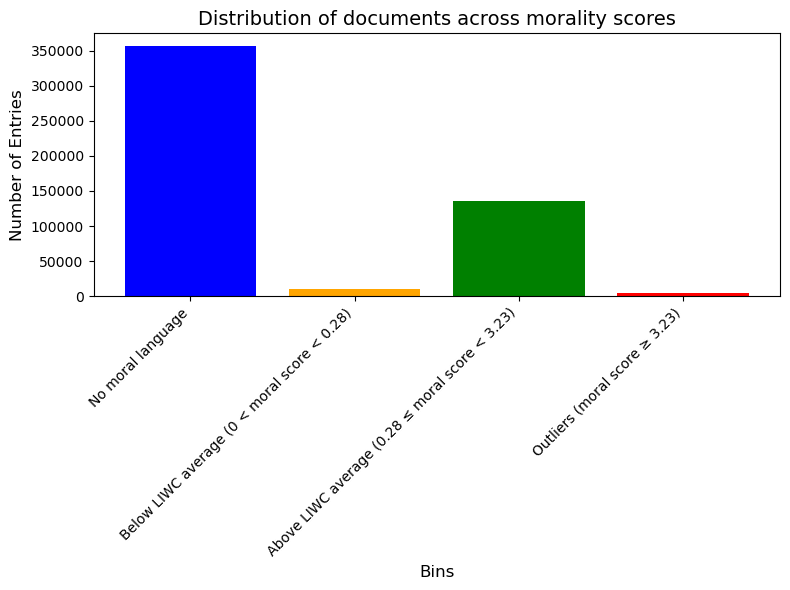

In [50]:
import matplotlib.pyplot as plt

# Count the number of entries in each bin
bin_sizes = [bin.shape[0] for bin in [bin_0, bin_1, bin_2, bin_3]]

# Define bin labels
bin_labels = ['No moral language', 
              'Below LIWC average (0 < moral score < 0.28)', 
              'Above LIWC average (0.28 ≤ moral score < 3.23)', 
              'Outliers (moral score ≥ 3.23)']

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(bin_labels, bin_sizes, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Bins', fontsize=12)
plt.ylabel('Number of Entries', fontsize=12)
plt.title('Distribution of documents across morality scores', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

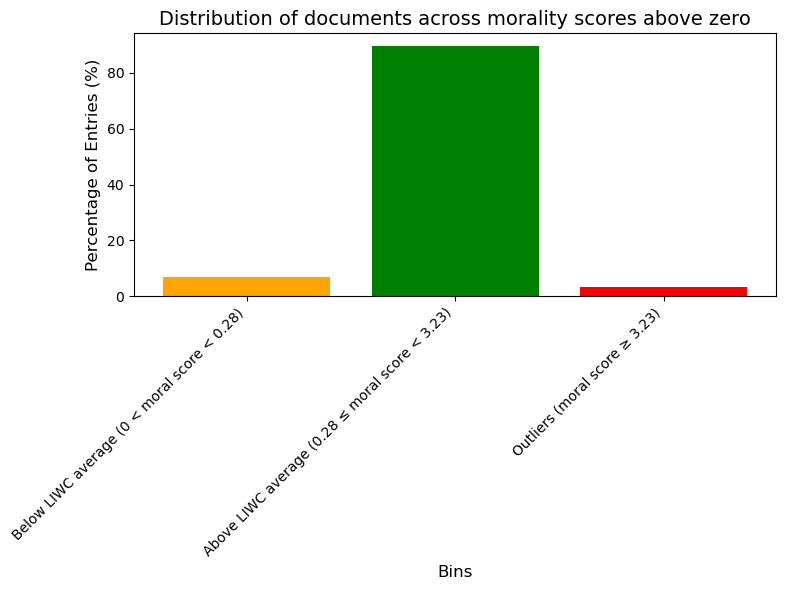

In [47]:
# Keep only bins 1, 2, and 3
selected_bins = [bin_1, bin_2, bin_3]

# Count the number of entries in these bins
bin_sizes = [bin.shape[0] for bin in selected_bins]

# Calculate percentages for these bins
total_count = sum(bin_sizes)
bin_percentages = [(size / total_count) * 100 for size in bin_sizes]

# Define updated bin labels
bin_labels = ['Below LIWC average (0 < moral score < 0.28)', 
              'Above LIWC average (0.28 ≤ moral score < 3.23)', 
              'Outliers (moral score ≥ 3.23)']

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(bin_labels, bin_percentages, color=['orange', 'green', 'red'])
plt.xlabel('Bins', fontsize=12)
plt.ylabel('Percentage of Entries (%)', fontsize=12)
plt.title('Distribution of documents across morality scores above zero', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Morality scores not evenly distributed across documents

Now look at topics percentages across each one

In [53]:
def calculate_topics_frequency(df, label): 
    # Flatten all lists in the column into a single list
    all_integers = [topic for sublist in df['relevant_topics'] for topic in sublist]
    # Count occurrences of each integer
    integer_counts = Counter(all_integers)
    count_df = pd.DataFrame(integer_counts.items(), columns=['topic', 'frequency_{}_bin'.format(label)]).sort_values(by='count', ascending=False)
    
    return count_df

In [ ]:
calculate_topics_frequency(bin0)

In [60]:
def calculate_topics_frequency(df, label): 
    # Flatten all lists in the column into a single list
    all_integers = [topic for sublist in df['relevant_topics'] for topic in sublist]
    # Count occurrences of each integer
    integer_counts = Counter(all_integers)
    # Calculate total count of all integers
    total_count = len(integer_counts.values())
    # Convert counts to percentages
    percentage_data = {topic: (count / total_count) * 100 for topic, count in integer_counts.items()}
    # Create a DataFrame with percentages
    percentage_df = pd.DataFrame(percentage_data.items(), columns=['topic', 'percentage_{}_bin'.format(label)]).sort_values(by='percentage_{}_bin'.format(label), ascending=False)
    
    return percentage_df

In [61]:
calculate_topics_frequency(bin_0, "no_moral_language")

,topic,percentage_no_moral_language_bin
3,4,1.143456e+06
1,6,1.124211e+06
2,3,8.799333e+05
7,8,8.536556e+05
0,0,8.511333e+05
6,7,8.321444e+05
4,5,7.684667e+05
8,2,6.014000e+05
5,1,5.148889e+05


In [57]:
calculate_topics_frequency(bin_1, "moral_language_below_liwc_avg")

,topic,percentage_moral_language_below_liwc_avg_bin
3,4,19.327592
4,8,17.003423
1,6,14.027824
8,0,11.493872
2,7,9.914983
7,5,9.611350
0,3,9.120018
5,2,5.708292
6,1,3.792647


In [58]:
calculate_topics_frequency(bin_2, "moral_language_above_liwc_avg")

,topic,percentage_moral_language_above_liwc_avg_bin
0,4,17.030978
6,5,15.366446
3,0,14.447226
4,7,11.181990
7,8,10.165307
1,6,9.089380
2,3,8.962104
8,2,8.193476
5,1,5.563094


In [59]:
calculate_topics_frequency(bin_3, "outliers")

,topic,percentage_outliers_bin
1,5,22.741623
7,0,17.608718
3,4,17.496690
0,2,9.247378
6,7,8.962216
5,3,6.925349
4,1,6.263367
2,8,5.805072
8,6,4.949588


Another approach

In [65]:
topic_columns = ['topic_{}'.format(n) for n in range(0,9)] 
topic_columns

['topic_0',
 'topic_1',
 'topic_2',
 'topic_3',
 'topic_4',
 'topic_5',
 'topic_6',
 'topic_7',
 'topic_8']

In [86]:
def calculate_topics_percentage(df, label):
    topic_columns = ['topic{}'.format(n) for n in range(0,9)] 
    # Calculate the sum of proportions for each topic
    topic_sums = df[topic_columns].sum()
    total_sum = topic_sums.sum()
    topic_percentage = (topic_sums / total_sum) * 100
    # Convert to DataFrame
    topic_percentage_df = pd.DataFrame({
        'topic': topic_percentage.index,
        'bin_{}'.format(label): topic_percentage.values
    })
    
    return topic_percentage_df


In [87]:
topics_bin0 = calculate_topics_percentage(bin_0, "no_moral_language")
topics_bin1 = calculate_topics_percentage(bin_1, "below_LIWC_average_moral_language")
topics_bin2 = calculate_topics_percentage(bin_2, "above_LIWC_average_moral_language")
topics_bin3 = calculate_topics_percentage(bin_3, "outliers")

topics_bin3

,topic,bin_outliers
0,topic0,17.351596
1,topic1,6.063425
2,topic2,9.201481
3,topic3,6.906610
4,topic4,17.703274
5,topic5,22.574650
6,topic6,5.189951
7,topic7,9.025357
8,topic8,5.983656


In [88]:
result1 = pd.merge(topics_bin0, topics_bin1, on='topic', how='inner')
result2 = pd.merge(result1, topics_bin2, on='topic', how='inner')
final_df = pd.merge(result2, topics_bin3, on='topic', how='inner')
final_df


,topic,bin_no_moral_language,bin_below_LIWC_average_moral_language,bin_above_LIWC_average_moral_language,bin_outliers
0,topic0,11.073062,11.227313,14.082980,17.351596
1,topic1,6.971984,6.242764,6.470745,6.063425
2,topic2,7.956947,6.791811,8.493539,9.201481
3,topic3,11.088355,9.693604,8.955967,6.906610
4,topic4,14.969661,16.873723,16.393686,17.703274
5,topic5,9.893709,10.418934,14.625099,22.574650
6,topic6,15.905247,13.378099,9.497708,5.189951
7,topic7,10.833568,10.109382,11.161344,9.025357
8,topic8,11.307467,15.264370,10.318931,5.983656


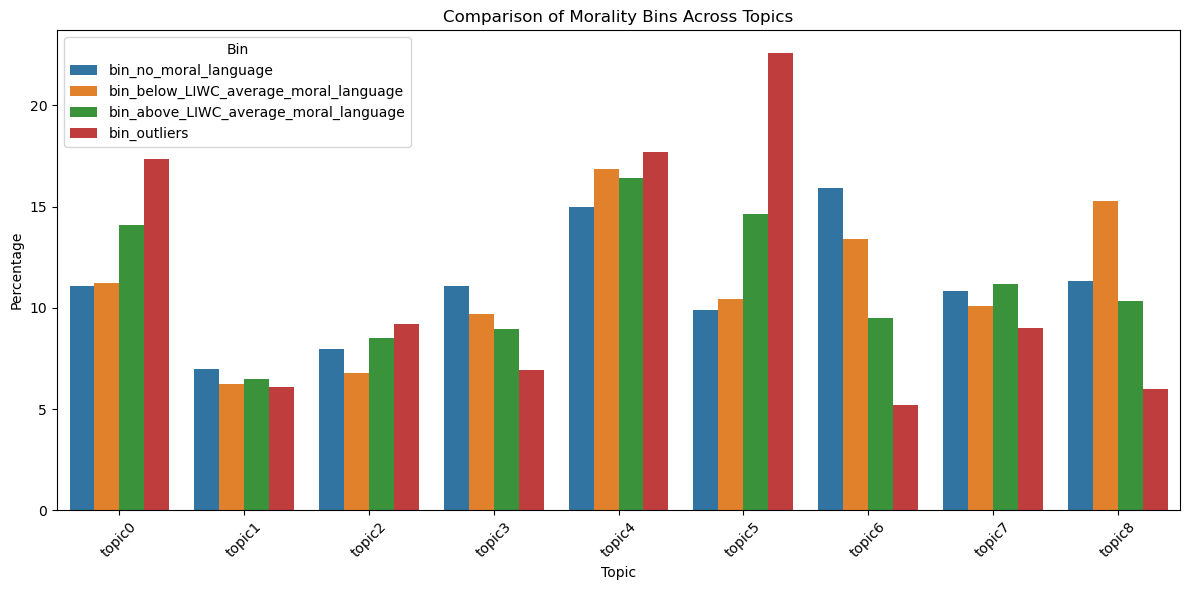

In [92]:
# Reshape the DataFrame to long format
df_melted = pd.melt(final_df, id_vars=['topic'], var_name='bin', value_name='value')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='topic', y='value', hue='bin', data=df_melted)

# Add labels and title
plt.title('Comparison of Morality Bins Across Topics')
plt.xlabel('Topic')
plt.ylabel('Percentage')
plt.xticks(rotation=45)  # Rotate topic names for better readability
plt.legend(title='Bin', loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

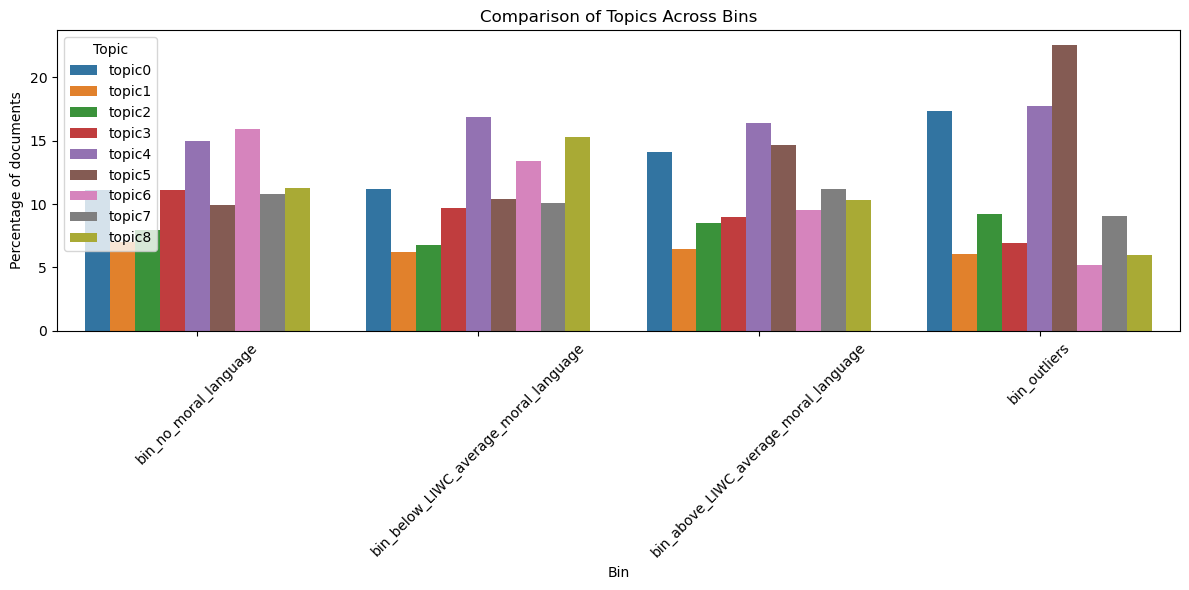

In [94]:
# Reshape the DataFrame to long format, keeping topics and bins as separate variables
df_melted = pd.melt(final_df, id_vars=['topic'], var_name='bin', value_name='value')

# Create a bar plot with bins on the x-axis and topics as the hue
plt.figure(figsize=(12, 6))
sns.barplot(x='bin', y='value', hue='topic', data=df_melted)

# Add labels and title
plt.title('Comparison of Topics Across Bins')
plt.xlabel('Bin')
plt.ylabel('Percentage of documents')
plt.xticks(rotation=45)  # Rotate bin labels for better readability
plt.legend(title='Topic', loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()